# Discret Time and Continuous Time

https://en.wikipedia.org/wiki/Discrete_time_and_continuous_time

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


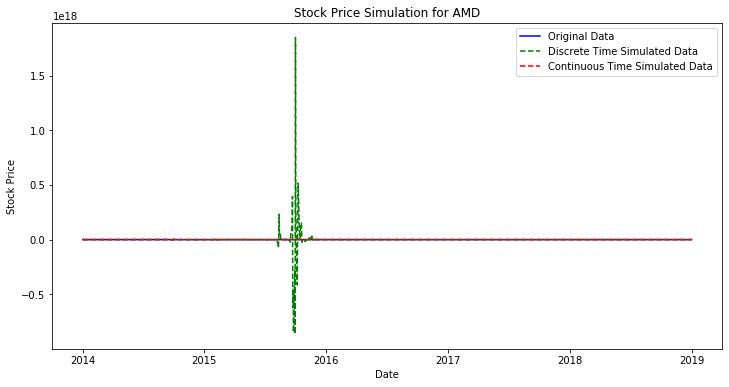

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a function for discrete time model
def discrete_time_model(data, alpha, beta):
    """
    Discrete time geometric Brownian motion model.
    
    :param data: A pandas Series containing stock price data.
    :param alpha: Drift rate.
    :param beta: Volatility (standard deviation).
    :return: A pandas Series containing simulated stock prices.
    """
    dt = 1  # Time step
    N = len(data)  # Number of time steps
    prices = [data[0]]  # Initialize the list with the initial price

    for i in range(1, N):
        price = prices[-1]
        dW = np.random.normal(0, 1) * np.sqrt(dt)
        price = price + alpha * price * dt + beta * price * dW
        prices.append(price)

    return pd.Series(prices, index=data.index)

# Define a function for continuous time model
def continuous_time_model(data, mu, sigma):
    """
    Continuous time geometric Brownian motion model.
    
    :param data: A pandas Series containing stock price data.
    :param mu: Drift rate.
    :param sigma: Volatility (standard deviation).
    :return: A pandas Series containing simulated stock prices.
    """
    dt = 1/252  # Time step (assuming daily data, 252 trading days in a year)
    N = len(data)  # Number of time steps
    prices = [data[0]]  # Initialize the list with the initial price

    for i in range(1, N):
        price = prices[-1]
        dW = np.random.normal(0, np.sqrt(dt))
        price = price + mu * price * dt + sigma * price * dW
        prices.append(price)

    return pd.Series(prices, index=data.index)
  
# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Download S&P 500 data
sp500 = yf.download('^GSPC', start, end)
# Calculate daily returns for S&P 500
sp500['S&P 500 Returns'] = sp500['Adj Close'].pct_change()


# Calculate daily returns for AMD
dataset['Returns'] = dataset['Adj Close'].pct_change()

# Merge the data
merged_data = pd.concat([dataset['Returns'], sp500['S&P 500 Returns']], axis=1)

# Drop missing values
merged_data = merged_data.dropna()

# Perform linear regression
regression = np.polyfit(merged_data['S&P 500 Returns'], merged_data['Returns'], 1)

# Parameters for the models
alpha_discrete = regression[1]  # Discrete time model drift rate
beta_discrete = regression[0]  # Discrete time model volatility

mu_continuous = dataset['Adj Close'].mean()  # Corrected this line
sigma_continuous = dataset['Adj Close'].std()  # Continuous time model volatility


# Simulate using discrete time model
discrete_simulated_data = discrete_time_model(dataset['Adj Close'], alpha_discrete, beta_discrete)

# Simulate using continuous time model
continuous_simulated_data = continuous_time_model(dataset['Adj Close'], mu_continuous, sigma_continuous)

# Plot the original data and the simulated data
plt.figure(figsize=(12, 6))
plt.plot(dataset['Adj Close'], label='Original Data', color='blue')
plt.plot(discrete_simulated_data, label='Discrete Time Simulated Data', color='green', linestyle='--')
plt.plot(continuous_simulated_data, label='Continuous Time Simulated Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price Simulation for {symbol}')
plt.legend()
plt.show()

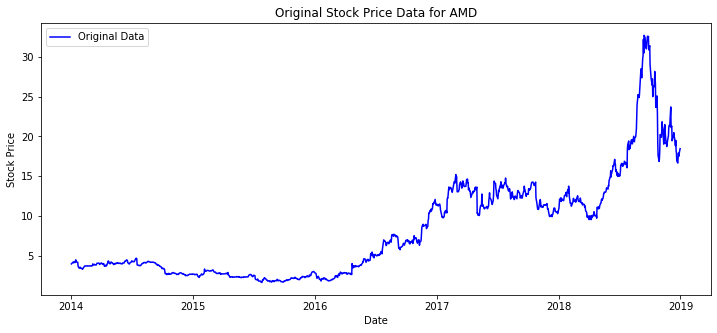

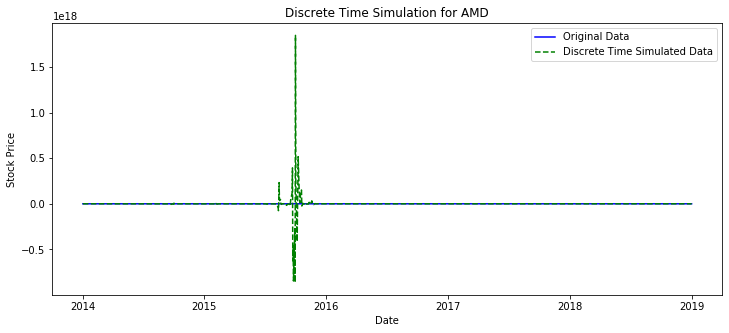

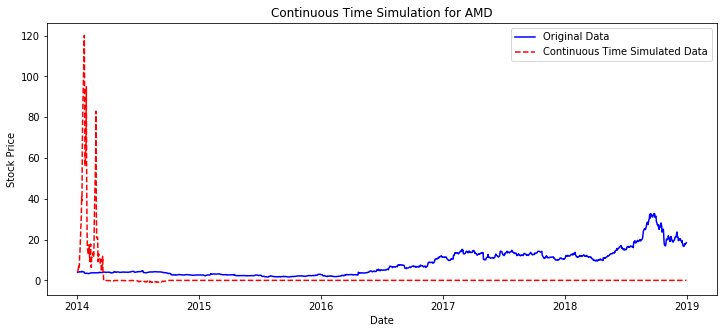

In [2]:
# Create a new figure for the original data
plt.figure(figsize=(12, 5))
plt.plot(dataset['Adj Close'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Original Stock Price Data for {symbol}')
plt.legend()
plt.show()

# Create a new figure for the discrete time model simulation
plt.figure(figsize=(12, 5))
plt.plot(dataset['Adj Close'], label='Original Data', color='blue')
plt.plot(discrete_simulated_data, label='Discrete Time Simulated Data', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Discrete Time Simulation for {symbol}')
plt.legend()
plt.show()

# Create a new figure for the continuous time model simulation
plt.figure(figsize=(12, 5))
plt.plot(dataset['Adj Close'], label='Original Data', color='blue')
plt.plot(continuous_simulated_data, label='Continuous Time Simulated Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Continuous Time Simulation for {symbol}')
plt.legend()
plt.show()


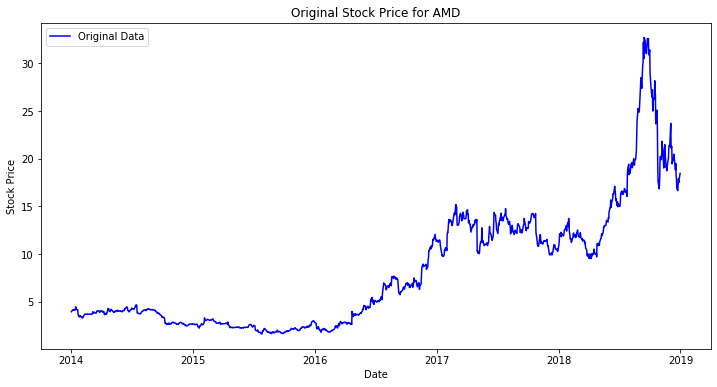

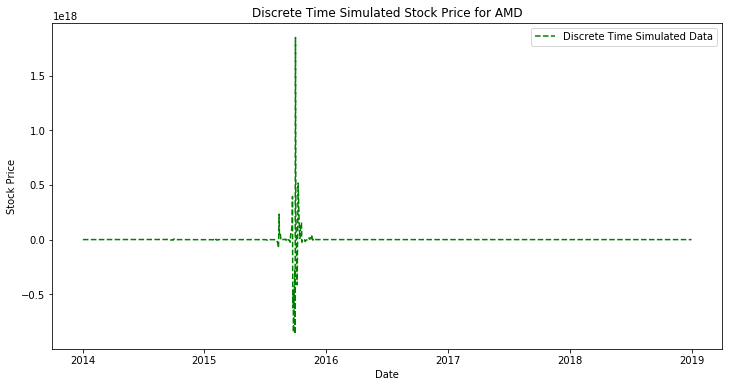

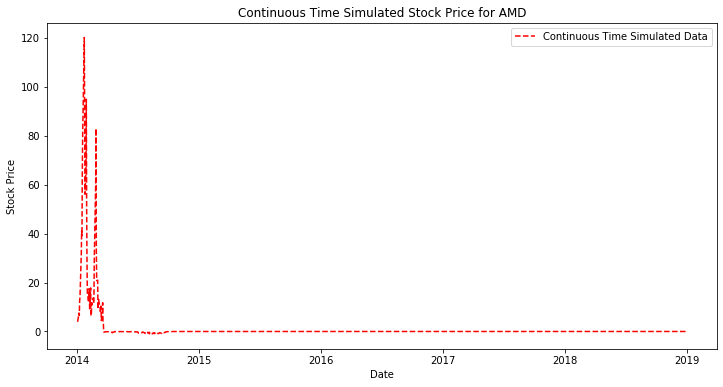

In [3]:
# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(dataset['Adj Close'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Original Stock Price for {symbol}')
plt.legend()
plt.show()

# Plot the discrete time simulated data
plt.figure(figsize=(12, 6))
plt.plot(discrete_simulated_data, label='Discrete Time Simulated Data', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Discrete Time Simulated Stock Price for {symbol}')
plt.legend()
plt.show()

# Plot the continuous time simulated data
plt.figure(figsize=(12, 6))
plt.plot(continuous_simulated_data, label='Continuous Time Simulated Data', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Continuous Time Simulated Stock Price for {symbol}')
plt.legend()
plt.show()